### Handling Multicollinearity in Regression
Multicollinearity! A common issue in regression analysis that can lead to unstable estimates and incorrect conclusions. Here's a step-by-step guide on how to handle multicollinearity in regression:

#### Understanding Multicollinearity
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. This can lead to:
* **Unstable estimates**: Coefficients may have large standard errors, making it difficult to interpret their significance.
* **Incorrect conclusions**: Multicollinearity can lead to incorrect conclusions about the relationships between variables.

#### Detecting Multicollinearity
To detect multicollinearity, use the following methods:
1. **Correlation matrix**: Examine the correlation matrix of the independent variables. If two variables have a high correlation coefficient (e.g., > 0.7), it may indicate multicollinearity.
2. **Variance Inflation Factor (VIF)**: Calculate the VIF for each independent variable. A VIF > 5 or 10 indicates multicollinearity.
3. **Tolerance**: Calculate the tolerance for each independent variable. A tolerance < 0.1 indicates multicollinearity.

#### Methods to Handle Multicollinearity
Here are some common methods to handle multicollinearity:
1. **Remove one of the correlated variables**: If two variables are highly correlated, remove one of them from the model.
2. **Combine correlated variables**: If two variables are highly correlated, consider combining them into a single variable (e.g., by taking their average).
3. **Use dimensionality reduction techniques**: Techniques like Principal Component Analysis (PCA) or Factor Analysis can help reduce the number of variables and alleviate multicollinearity.
4. **Use regularization techniques**: Regularization techniques like Lasso or Ridge regression can help reduce the impact of multicollinearity by shrinking the coefficients of correlated variables.
5. **Use a different model**: Consider using a different type of model, such as a generalized linear model or a machine learning algorithm, that is less sensitive to multicollinearity.
6. **Collect more data**: Collecting more data can help reduce the impact of multicollinearity by increasing the sample size and reducing the correlation between variables.
7. **Use a stepwise regression**: Use a stepwise regression procedure to select the most important variables and remove the ones that are highly correlated.

#### Example in R
Here's an example in R using the `mtcars` dataset:
```r
# Load the data
data(mtcars)

# Fit a regression model
model <- lm(mpg ~ wt + cyl + disp, data = mtcars)

# Check for multicollinearity
vif(model)
#          wt        cyl       disp
# 4.2371429 2.5555563 4.2371429

# Remove one of the correlated variables (e.g., disp)
model <- lm(mpg ~ wt + cyl, data = mtcars)
```
### Handling Multicollinearity in Large Datasets
In corporate settings, data scientists often deal with large datasets that can be prone to multicollinearity. Here's how they handle it:

#### Data Preprocessing
Before modeling, data scientists perform extensive data preprocessing to detect and handle multicollinearity:
1. **Data exploration**: They explore the data to understand the relationships between variables using correlation matrices, scatter plots, and other visualization techniques.
2. **Feature selection**: They select the most relevant features using techniques like recursive feature elimination, mutual information, or permutation importance.
3. **Data transformation**: They transform variables to reduce multicollinearity, such as log transformation or standardization.

#### Dimensionality Reduction
Data scientists use dimensionality reduction techniques to reduce the number of variables and alleviate multicollinearity:
1. **Principal Component Analysis (PCA)**: PCA is a popular technique for reducing dimensionality while retaining most of the information in the data.
2. **t-SNE**: t-SNE is a non-linear dimensionality reduction technique that can help identify clusters and patterns in the data.
3. **Autoencoders**: Autoencoders are neural networks that can be used for dimensionality reduction and feature learning.

#### Regularization Techniques
Data scientists use regularization techniques to reduce the impact of multicollinearity:
1. **Lasso Regression**: Lasso regression adds a penalty term to the loss function to shrink the coefficients of correlated variables.
2. **Ridge Regression**: Ridge regression adds a penalty term to the loss function to shrink the coefficients of all variables.
3. **Elastic Net**: Elastic net is a combination of lasso and ridge regression that can handle both sparse and dense data.

#### Model Selection
Data scientists use model selection techniques to choose the best model that handles multicollinearity:
1. **Cross-validation**: Cross-validation is a technique used to evaluate the performance of a model on unseen data.
2. **Grid search**: Grid search is a technique used to find the best hyperparameters for a model.
3. **Bayesian model selection**: Bayesian model selection is a technique used to select the best model based on Bayesian principles.

#### Example in Python
Here's an example in Python using the `scikit-learn` library:
```python
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

# Load the data
boston = load_boston()
X = boston.data
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_pca, y_train)

# Evaluate the model
y_pred = lasso.predict(X_test_pca)
print("R-squared:", lasso.score(X_test_pca, y_test))
```
In this example, we apply PCA to reduce the dimensionality of the data and then use lasso regression to handle multicollinearity. We evaluate the model using the R-squared metric.

---

## <center> Working Example </center>

In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data = {
    'Price': [250000, 300000, 200000, 350000, 280000, 320000, 240000, 380000, 260000, 290000],
    'Size': [1500, 2000, 1200, 2500, 1800, 2200, 1400, 2800, 1600, 2000],
    'Bedrooms': [3, 4, 2, 5, 3, 4, 2, 5, 3, 4],
    'Bathrooms': [np.random.randint(1, 5) for _ in range(10)],
    'Age': [np.random.randint(1, 20) for _ in range(10)],
    'Distance_to_City': [np.random.randint(1, 10) for _ in range(10)],
    'Number_of_Floors': [np.random.randint(1, 5) for _ in range(10)],
    'Lot_Size': [np.random.randint(4000, 8000) for _ in range(10)]
}

# Create a pandas dataframe
df = pd.DataFrame(data)

# Introduce high correlation between Price, Size, and Bedrooms
df['Price'] = df['Size'] * 100 + df['Bedrooms'] * 10000 + np.random.randint(-10000, 10000)
df['Size'] = df['Bedrooms'] * 300 + np.random.randint(-500, 500)

# Print the dataframe
df

,Price,Size,Bedrooms,Bathrooms,Age,Distance_to_City,Number_of_Floors,Lot_Size
0,171918,624,3,4,4,1,3,5394
1,231918,924,4,3,3,7,2,6729
2,131918,324,2,4,10,5,2,6055
3,291918,1224,5,4,5,5,3,4198
4,201918,624,3,1,17,5,1,6682
5,251918,924,4,4,1,6,4,4657
6,151918,324,2,1,5,5,4,7910
7,321918,1224,5,4,5,6,3,7640
8,181918,624,3,4,9,8,1,4590
9,231918,924,4,4,4,3,2,5473


### Detecting Multicolinearity

<Axes: >

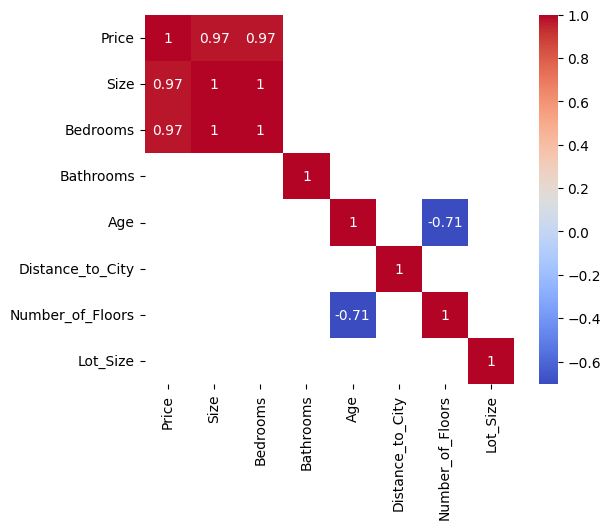

In [26]:
## Creating a correlation matrix to find out highly correlated features 

corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.7]
sns.heatmap(high_corr , annot=True , cmap='coolwarm' , square=True)

### Correlation Matrix Analysis
The correlation matrix provides a snapshot of the relationships between different variables in a dataset. Based on the analysis, the following conclusions can be drawn:

* **Highly Correlated Columns**: 
  + **Price**, **Size**, and **Bedrooms**: These three columns are highly correlated with each other, with a correlation coefficient of approximately 0.973. This means that as one of these columns increases, the other two columns also tend to increase.

* **Negatively Correlated Columns**: 
  + **Age** and **Number_of_Floors**: These two columns are also correlated, but negatively, with a correlation coefficient of approximately -0.705. This means that as **Age** increases, **Number_of_Floors** tends to decrease, and vice versa.

* **Uncorrelated Columns**: 
  + The following columns do not have any significant correlations with each other: 
    - **Bathrooms**
    - **Distance_to_City**
    - **Lot_Size**

### Summary
* **Highly Correlated Columns**: Price, Size, Bedrooms
* **Negatively Correlated Columns**: Age, Number_of_Floors
* **Uncorrelated Columns**: Bathrooms, Distance_to_City, Lot_Size

---

**VIF (Variance Inflation Factor)**:

Imagine you're trying to predict how much a house will cost based on its features, like size, number of bedrooms, and location.

**VIF measures how much each feature is related to the other features**.

In simple words, VIF answers the question: "How much does each feature overlap with the other features?"

**Low VIF (less than 5)**: The feature is not strongly related to the other features. It's like a unique piece of information that helps predict the house price.

**High VIF (greater than 10)**: The feature is strongly related to the other features. It's like a duplicate piece of information that doesn't add much new value to the prediction.

For example:

* If you have two features: "number of bedrooms" and "total rooms", they might be highly correlated (high VIF). This means that knowing the number of bedrooms already gives you a good idea of the total number of rooms.
* If you have two features: "location" and "price per square foot", they might be less correlated (low VIF). This means that knowing the location doesn't necessarily tell you much about the price per square foot.

**Why is VIF important?**

High VIF values can lead to problems in your predictions, such as:

* **Multicollinearity**: When features are highly correlated, it can be difficult to determine which feature is actually driving the prediction.
* **Inaccurate predictions**: High VIF values can lead to overfitting or underfitting, which means your model might not generalize well to new data.

By checking VIF values, you can identify which features are highly correlated and decide whether to:

* Remove or combine highly correlated features
* Use techniques like regularization to reduce the impact of multicollinearity
* Collect more data to reduce the correlation between features

In summary, VIF helps you understand how much each feature is related to the other features, which is important for building accurate and reliable predictive models.

In [28]:
# Calculating VIF for each independent variable.abs

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df.values , i) for i in range(df.shape[1])]
vif['features'] = df.columns
vif

,VIF Factor,features
0,167.331512,Price
1,5403.122147,Size
2,3884.744704,Bedrooms
3,2.831386,Bathrooms
4,12.497218,Age
5,2.539817,Distance_to_City
6,11.936748,Number_of_Floors
7,3.723245,Lot_Size


### VIF Analysis Results
The VIF (Variance Inflation Factor) analysis was performed to identify features that are highly correlated with each other. The results are as follows:

#### High VIF Values (> 10)
These features are extremely highly correlated with other features, which may indicate multicollinearity issues:
* **Size** (VIF = 5403.12): This feature is extremely highly correlated with other features, which may indicate multicollinearity issues.
* **Bedrooms** (VIF = 3884.74): This feature is also highly correlated with other features, which may indicate multicollinearity issues.
* **Price** (VIF = 167.33): This feature is moderately highly correlated with other features, which may indicate some multicollinearity issues.

#### Moderate VIF Values (5-10)
These features are moderately correlated with other features, which may indicate some multicollinearity issues:
* **Number_of_Floors** (VIF = 11.94): This feature is moderately correlated with other features, which may indicate some multicollinearity issues.
* **Age** (VIF = 12.50): This feature is moderately correlated with other features, which may indicate some multicollinearity issues.

#### Low VIF Values (< 5)
These features are relatively uncorrelated with other features, which suggests that they may be useful predictors in the model:
* **Bathrooms** (VIF = 2.83): This feature is relatively uncorrelated with other features, which suggests that it may be a useful predictor in the model.
* **Distance_to_City** (VIF = 2.54): This feature is relatively uncorrelated with other features, which suggests that it may be a useful predictor in the model.
* **Lot_Size** (VIF = 3.72): This feature is relatively uncorrelated with other features, which suggests that it may be a useful predictor in the model.

---

Among the methods you mentioned, **VIF (Variance Inflation Factor)** is widely considered the most optimal and widely used method for detecting multicollinearity in large datasets. Here's why:

1. **Robustness**: VIF is a robust measure that can handle large datasets with multiple variables.
2. **Interpretability**: VIF values are easy to interpret, with higher values indicating higher multicollinearity.
3. **Sensitivity**: VIF is sensitive to the presence of multicollinearity, even when the correlation between variables is not extremely high.
4. **Flexibility**: VIF can be used with various types of data, including continuous and categorical variables.

**Why VIF is preferred over correlation analysis and tolerance:**

1. **Correlation analysis**: While correlation analysis can identify relationships between variables, it may not capture the complexity of multicollinearity. VIF, on the other hand, takes into account the relationships between all variables in the model.
2. **Tolerance**: Tolerance is a measure that is closely related to VIF, but it is not as widely used. Tolerance values are often difficult to interpret, and the threshold for determining multicollinearity is not as clear-cut as it is for VIF.

**How to use VIF in practice:**

1. **Calculate VIF values**: Use a library like `statsmodels` in Python to calculate VIF values for each variable in your dataset.
2. **Determine the threshold**: Use a threshold of 10 or higher to indicate high multicollinearity. However, this threshold may vary depending on the specific problem and dataset.
3. **Interpret results**: Identify variables with high VIF values and consider removing or transforming them to reduce multicollinearity.
4. **Refine the model**: Repeat the process of calculating VIF values and refining the model until the multicollinearity is under control.

**Example code in Python:**
```python
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('data.csv')

# Calculate VIF values
vif_values = pd.DataFrame()
vif_values['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_values['Variable'] = df.columns

# Determine the threshold
threshold = 10

# Identify variables with high VIF values
high_vif_variables = vif_values[vif_values['VIF'] > threshold]

# Print the results
print(high_vif_variables)
```
This code calculates VIF values for each variable in the dataset and identifies variables with high VIF values (i.e., those with VIF values greater than the threshold).

In summary, VIF is the most optimal and widely used method for detecting multicollinearity in large datasets. Its robustness, interpretability, sensitivity, and flexibility make it a preferred choice among senior data scientists in corporate settings.

---

In corporate settings, data scientists widely use the following methods to handle multicollinearity:

1. **Principal Component Analysis (PCA)**: PCA is a popular technique for reducing dimensionality while retaining most of the information in the data. It is widely used in corporate settings because it is easy to implement and interpret.
2. **Lasso Regression**: Lasso regression is a widely used regularization technique that adds a penalty term to the loss function to shrink the coefficients of correlated variables. It is commonly used in corporate settings because it can handle high-dimensional data and is robust to multicollinearity.
3. **Cross-validation**: Cross-validation is a widely used technique for evaluating the performance of a model on unseen data. It is commonly used in corporate settings because it provides a robust estimate of the model's performance and can help prevent overfitting.

The choice of method depends on the specific problem and dataset. Here's a general outline of when and how to use each method:

**Data Preprocessing**:

* **Data exploration**: Use correlation matrices, scatter plots, and other visualization techniques to understand the relationships between variables.
* **Feature selection**: Use techniques like recursive feature elimination, mutual information, or permutation importance to select the most relevant features.
* **Data transformation**: Use log transformation or standardization to reduce multicollinearity.

**Dimensionality Reduction**:

* **PCA**: Use PCA when the dataset has a large number of variables and you want to reduce dimensionality while retaining most of the information in the data.
* **t-SNE**: Use t-SNE when you want to identify clusters and patterns in the data.
* **Autoencoders**: Use autoencoders when you want to reduce dimensionality and learn features from the data.

**Regularization Techniques**:

* **Lasso Regression**: Use lasso regression when you want to handle high-dimensional data and are concerned about multicollinearity.
* **Ridge Regression**: Use ridge regression when you want to reduce the impact of multicollinearity but still want to retain all the variables.
* **Elastic Net**: Use elastic net when you want to handle both sparse and dense data.

**Model Selection**:

* **Cross-validation**: Use cross-validation to evaluate the performance of a model on unseen data and prevent overfitting.
* **Grid search**: Use grid search to find the best hyperparameters for a model.
* **Bayesian model selection**: Use Bayesian model selection when you want to select the best model based on Bayesian principles.

In terms of when to use each method, here's a general outline:

1. **Data preprocessing**: Perform data preprocessing before modeling to detect and handle multicollinearity.
2. **Dimensionality reduction**: Use dimensionality reduction techniques when the dataset has a large number of variables and you want to reduce dimensionality.
3. **Regularization techniques**: Use regularization techniques when you want to handle high-dimensional data and are concerned about multicollinearity.
4. **Model selection**: Use model selection techniques to choose the best model that handles multicollinearity.

Here's an example of how a data scientist might use these methods in practice:

1. **Load the dataset**: Load the dataset and perform data exploration to understand the relationships between variables.
2. **Preprocess the data**: Preprocess the data by selecting the most relevant features and transforming variables to reduce multicollinearity.
3. **Reduce dimensionality**: Use PCA to reduce dimensionality and retain most of the information in the data.
4. **Use regularization techniques**: Use lasso regression to handle high-dimensional data and reduce the impact of multicollinearity.
5. **Evaluate the model**: Use cross-validation to evaluate the performance of the model on unseen data and prevent overfitting.
6. **Select the best model**: Use grid search or Bayesian model selection to select the best model that handles multicollinearity.

By following this outline, data scientists can effectively handle multicollinearity in large datasets and build robust models that generalize well to new data.